In [135]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

In [146]:
num_points = 1000
radius = 1
x = torch.rand(num_points,2)*2-1
y = ((x[:,0]**2+x[:,1]**2)<radius**2).float()

# x[:,0].shape
# data = {
#     'x':x[:,0],
#     'y':x[:,1],
#     'in':y
# }
# data = pd.DataFrame(data)
# data


In [147]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [148]:
class Model(nn.Module):
    def __init__(self, ):
        super(Model,self).__init__()
        self.hl1 = nn.Linear(2,16)
        self.hl2 = nn.Linear(16,1)
    
    def forward(self,x):
        x = self.hl1(x)
        x = nn.ReLU()(x)
        x = self.hl2(x)
        x = nn.Sigmoid()(x)        
        return x
        
        

In [142]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [158]:
model = Model().to(device=device)
optimiser = torch.optim.Adam(model.parameters(),lr = 0.01)
loss_fn = nn.BCELoss()


In [159]:
def train(epoch):
    model.train()
    
    for batch_idx,(data,target) in enumerate(train_loader):
        data,target = data.to(device),target.to(device)
        target = target.view(-1, 1)
        optimiser.zero_grad()
        
        output = model(data)
        loss = loss_fn(output,target)
        
        loss.backward()
        optimiser.step()
        
        n = len(train_loader.dataset)
        if batch_idx%20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{n} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')


def test():
    model.eval()
    
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data,target in test_loader:
            data,target = data.to(device),target.to(device)
            target = target.view(-1, 1)
            output = model(data)
            test_loss +=loss_fn(output,target).item()
            pred = (output > 0.5).float()
            correct +=pred.eq(target.view_as(pred)).sum().item()
            
        n = len(test_loader.dataset)
        test_loss/=n
        print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{n} '
              f'({100. * correct / n:.0f}%)\n')
       

In [160]:
for epoch in range(1,100):
    train(epoch)
    test()

Train Epoch: 1 [0/800 (0%)]	Loss: 0.706792
Train Epoch: 1 [640/800 (80%)]	Loss: 0.448755

Test set: Average loss: 0.0204, Accuracy: 146/200 (73%)

Train Epoch: 2 [0/800 (0%)]	Loss: 0.551870
Train Epoch: 2 [640/800 (80%)]	Loss: 0.558793

Test set: Average loss: 0.0202, Accuracy: 146/200 (73%)

Train Epoch: 3 [0/800 (0%)]	Loss: 0.618011
Train Epoch: 3 [640/800 (80%)]	Loss: 0.488220

Test set: Average loss: 0.0179, Accuracy: 146/200 (73%)

Train Epoch: 4 [0/800 (0%)]	Loss: 0.324801
Train Epoch: 4 [640/800 (80%)]	Loss: 0.456070

Test set: Average loss: 0.0158, Accuracy: 146/200 (73%)

Train Epoch: 5 [0/800 (0%)]	Loss: 0.361398
Train Epoch: 5 [640/800 (80%)]	Loss: 0.303713

Test set: Average loss: 0.0144, Accuracy: 150/200 (75%)

Train Epoch: 6 [0/800 (0%)]	Loss: 0.399539
Train Epoch: 6 [640/800 (80%)]	Loss: 0.336551

Test set: Average loss: 0.0125, Accuracy: 159/200 (80%)

Train Epoch: 7 [0/800 (0%)]	Loss: 0.232523
Train Epoch: 7 [640/800 (80%)]	Loss: 0.289466

Test set: Average loss: 0.01

C:\Users\Harish K B\AppData\Local\Temp\ipykernel_18784\3528963197.py:28: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap="coolwarm", marker='x', label="Test Data")


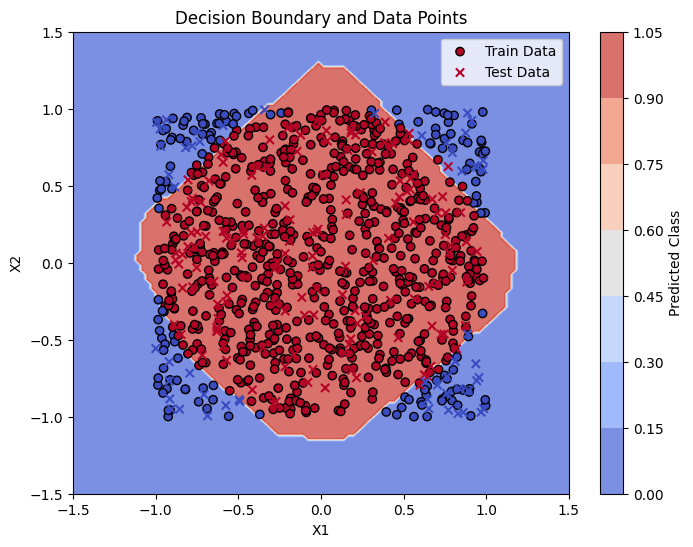

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Create a 2D grid of points covering the input space
x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Convert to a torch tensor and move to the correct device
grid_points = torch.tensor(grid_points, dtype=torch.float32).to(device)

# Get model predictions for the grid points
model.eval()  # Switch to evaluation mode
with torch.no_grad():
    outputs = model(grid_points)
    predictions = (outputs > 0.5).float()  # Threshold at 0.5 to classify as 0 or 1

# Reshape the predictions back to the grid shape
predictions = predictions.cpu().numpy().reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, predictions, alpha=0.75, cmap="coolwarm")
plt.colorbar(label='Predicted Class')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap="coolwarm", marker='o', label="Train Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap="coolwarm", marker='x', label="Test Data")

# Label the plot
plt.title("Decision Boundary and Data Points")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()
